In [1]:
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
path = r"C:\Users\vinic\Downloads\archive (1).csv"
df2 = pd.read_csv(path, low_memory=False)

In [3]:
df2.head()

,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,-23.199997,-46.899994,745.0,-10800,America/Sao_Paulo,-03
1,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),rain (mm)
2,1940-01-01T00:00,16.1,98,15.9,17.0,NaN
3,1940-01-01T-23:00,16.1,98,15.8,17.0,NaN
4,1940-01-01T-22:00,16.2,98,15.9,17.1,NaN


In [4]:
df = pd.read_csv(path, low_memory=False, skiprows = 3)

In [5]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),rain (mm)
0,1940-01-01T00:00,16.1,98,15.9,17.0,NaN
1,1940-01-01T-23:00,16.1,98,15.8,17.0,NaN
2,1940-01-01T-22:00,16.2,98,15.9,17.1,NaN
3,1940-01-01T-21:00,16.2,98,15.9,17.2,NaN
4,1940-01-01T-20:00,16.2,97,15.8,17.3,0.00


In [6]:
print(df.dtypes)

time                         object
temperature_2m (°C)          object
relativehumidity_2m (%)      object
dewpoint_2m (°C)             object
apparent_temperature (°C)    object
rain (mm)                    object
dtype: object


In [7]:
df.apply(pd.isnull).sum()

time                          0
temperature_2m (°C)          28
relativehumidity_2m (%)      28
dewpoint_2m (°C)             29
apparent_temperature (°C)    27
rain (mm)                    31
dtype: int64

In [8]:
df.apply(pd.isnull).sum()/df.shape[0]

time                         0.000000
temperature_2m (°C)          0.000037
relativehumidity_2m (%)      0.000037
dewpoint_2m (°C)             0.000038
apparent_temperature (°C)    0.000036
rain (mm)                    0.000041
dtype: float64

In [9]:
df["rain (mm)"].value_counts()

0.00                568425
0.10                 39998
0.20                 25541
0.30                 14866
0.40                 10460
                     ...  
1967-09-12T18:01         1
1967-09-11T18:01         1
1967-09-10T18:00         1
1967-09-09T18:00         1
2023-04-07T18:02         1
Name: rain (mm), Length: 30559, dtype: int64

In [10]:
df["rain (mm)"] = df["rain (mm)"].fillna(0)

In [11]:
df["rain (mm)"].value_counts()

0.00                568425
0.10                 39998
0.20                 25541
0.30                 14866
0.40                 10460
                     ...  
1967-09-12T18:01         1
1967-09-11T18:01         1
1967-09-10T18:00         1
1967-09-09T18:00         1
2023-04-07T18:02         1
Name: rain (mm), Length: 30560, dtype: int64

In [12]:
df["temperature_2m (°C)"] = df["temperature_2m (°C)"].fillna(method='ffill')

In [13]:
df["temperature_2m (°C)"].value_counts()

20.1                       7388
19.9                       7375
19.7                       7313
20.0                       7308
19.6                       7257
                           ... 
37.9                          1
36.8                          1
37.7                          1
37.5                          1
temperature_2m_max (°C)       1
Name: temperature_2m (°C), Length: 367, dtype: int64

In [14]:
df.apply(pd.isnull).sum()/df.shape[0]

time                         0.000000
temperature_2m (°C)          0.000000
relativehumidity_2m (%)      0.000037
dewpoint_2m (°C)             0.000038
apparent_temperature (°C)    0.000036
rain (mm)                    0.000000
dtype: float64

In [15]:
df["relativehumidity_2m (%)"] = df["relativehumidity_2m (%)"].fillna(method='ffill')
df["dewpoint_2m (°C)"] = df["dewpoint_2m (°C)"].fillna(method='ffill')
df["apparent_temperature (°C)"] = df["apparent_temperature (°C)"].fillna(method='ffill')
df.apply(pd.isnull).sum()/df.shape[0]

time                         0.0
temperature_2m (°C)          0.0
relativehumidity_2m (%)      0.0
dewpoint_2m (°C)             0.0
apparent_temperature (°C)    0.0
rain (mm)                    0.0
dtype: float64

In [18]:
df.index

RangeIndex(start=0, stop=760326, step=1)

In [32]:
# Check for missing value defined in data documentation
df.apply(lambda x: (x == 999999).sum())

time                         0
temperature_2m (°C)          0
relativehumidity_2m (%)      0
dewpoint_2m (°C)             0
apparent_temperature (°C)    0
rain (mm)                    0
dtype: int64

In [33]:
df.dtypes

time                          object
temperature_2m (°C)           object
relativehumidity_2m (%)      float64
dewpoint_2m (°C)              object
apparent_temperature (°C)     object
rain (mm)                     object
dtype: object

In [34]:
#df['relativehumidity_2m (%)'] = df['relativehumidity_2m (%)'].astype(float)
df = df.drop(df.index[729890:729920])
df['relativehumidity_2m (%)'] = pd.to_numeric(df['relativehumidity_2m (%)'])

In [35]:
df.dtypes

time                          object
temperature_2m (°C)           object
relativehumidity_2m (%)      float64
dewpoint_2m (°C)              object
apparent_temperature (°C)     object
rain (mm)                     object
dtype: object

In [40]:
# convert column A from object to float
df[['temperature_2m (°C)', 'rain (mm)']] = df[['temperature_2m (°C)', 'rain (mm)']].apply(pd.to_numeric, errors='coerce')
df[['apparent_temperature (°C)', 'dewpoint_2m (°C)']] = df[['apparent_temperature (°C)', 'dewpoint_2m (°C)']].apply(pd.to_numeric, errors='coerce')


print(df.dtypes)


time                          object
temperature_2m (°C)          float64
relativehumidity_2m (%)      float64
dewpoint_2m (°C)             float64
apparent_temperature (°C)    float64
rain (mm)                    float64
dtype: object


In [41]:
from datetime import datetime

In [44]:
#df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M'))
#df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT-%H:%M'))
df['time'] = pd.to_datetime(df['time'].str.replace('-', ''), format='%Y%m%dT%H:%M')


In [45]:
df.dtypes

time                         datetime64[ns]
temperature_2m (°C)                 float64
relativehumidity_2m (%)             float64
dewpoint_2m (°C)                    float64
apparent_temperature (°C)           float64
rain (mm)                           float64
dtype: object

In [48]:
df['time'].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            760316, 760317, 760318, 760319, 760320, 760321, 760322, 760323,
            760324, 760325],
           dtype='int64', length=760266)

In [50]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),rain (mm)
0,1940-01-01 00:00:00,16.1,98.0,15.9,17.0,0.0
1,1940-01-01 23:00:00,16.1,98.0,15.8,17.0,0.0
2,1940-01-01 22:00:00,16.2,98.0,15.9,17.1,0.0
3,1940-01-01 21:00:00,16.2,98.0,15.9,17.2,0.0
4,1940-01-01 20:00:00,16.2,97.0,15.8,17.3,0.0


In [55]:
df = df.set_index('time')

In [56]:
df.head()

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),rain (mm)
time,,,,,
1940-01-01 00:00:00,16.1,98.0,15.9,17.0,0.0
1940-01-01 23:00:00,16.1,98.0,15.8,17.0,0.0
1940-01-01 22:00:00,16.2,98.0,15.9,17.1,0.0
1940-01-01 21:00:00,16.2,98.0,15.9,17.2,0.0
1940-01-01 20:00:00,16.2,97.0,15.8,17.3,0.0


In [58]:
df.index

DatetimeIndex(['1940-01-01 00:00:00', '1940-01-01 23:00:00',
               '1940-01-01 22:00:00', '1940-01-01 21:00:00',
               '1940-01-01 20:00:00', '1940-01-01 19:00:00',
               '1940-01-01 18:00:00', '1940-01-01 17:00:00',
               '1940-01-01 16:00:00', '1940-01-01 15:00:00',
               ...
               '2023-03-29 00:00:00', '2023-03-30 00:00:00',
               '2023-03-31 00:00:00', '2023-04-01 00:00:00',
               '2023-04-02 00:00:00', '2023-04-03 00:00:00',
               '2023-04-04 00:00:00', '2023-04-05 00:00:00',
               '2023-04-06 00:00:00', '2023-04-07 00:00:00'],
              dtype='datetime64[ns]', name='time', length=760266, freq=None)

In [59]:
df.index.year

Int64Index([1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='time', length=760266)

<AxesSubplot:xlabel='time'>

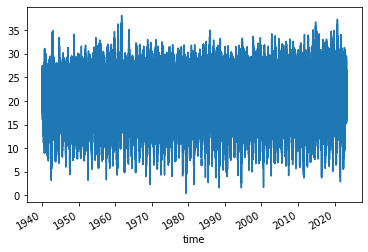

In [60]:
df["temperature_2m (°C)"].plot()

In [61]:
df.index.year.value_counts().sort_index()

1940    9114
1941    9125
1942    9125
1943    9125
1944    9150
        ... 
2019    9125
2020    9150
2021    9125
2022    9125
2023    2403
Name: time, Length: 84, dtype: int64

<AxesSubplot:xlabel='time'>

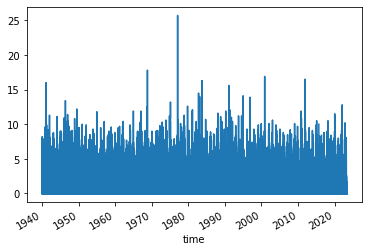

In [62]:
df["rain (mm)"].plot()

<AxesSubplot:xlabel='time'>

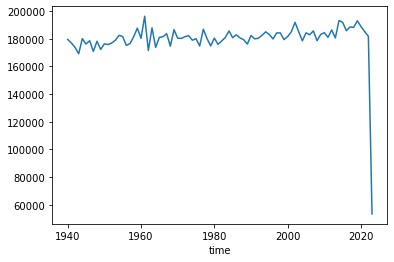

In [64]:
df.groupby(df.index.year).apply(lambda x: x["temperature_2m (°C)"].sum()).plot()

In [65]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [66]:
predictors = ["temperature_2m (°C)"]

In [68]:
train = df.loc[:"1980-12-31"]
test = df.loc["2010-01-01":]

In [69]:
train

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),rain (mm)
time,,,,,
1940-01-01 00:00:00,16.1,98.0,15.9,17.0,0.0
1940-01-01 23:00:00,16.1,98.0,15.8,17.0,0.0
1940-01-01 22:00:00,16.2,98.0,15.9,17.1,0.0
1940-01-01 21:00:00,16.2,98.0,15.9,17.2,0.0
1940-01-01 20:00:00,16.2,97.0,15.8,17.3,0.0
...,...,...,...,...,...
1980-12-27 00:00:00,26.0,18.8,21.7,NaN,NaN
1980-12-28 00:00:00,24.4,19.6,21.8,NaN,NaN
1980-12-29 00:00:00,27.0,19.5,22.1,NaN,NaN


In [70]:
test

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),rain (mm)
time,,,,,
2010-01-01 00:00:00,20.2,94.0,19.3,21.7,0.0
2010-01-01 01:00:00,20.2,95.0,19.3,21.8,0.0
2010-01-01 02:00:00,20.2,95.0,19.3,21.8,0.1
2010-01-01 03:00:00,20.2,95.0,19.3,22.1,0.1
2010-01-01 04:00:00,19.5,94.0,18.5,21.4,1.6
...,...,...,...,...,...
2023-04-03 00:00:00,25.8,15.3,20.1,NaN,NaN
2023-04-04 00:00:00,26.8,15.6,21.1,NaN,NaN
2023-04-05 00:00:00,26.4,15.7,20.7,NaN,NaN


In [71]:
reg.fit(train[predictors], train["temperature_2m (°C)"])

Ridge(alpha=0.1)

In [72]:
predictions = reg.predict(test[predictors])

In [73]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["temperature_2m (°C)"], predictions)

4.112605763108921e-15

In [74]:
combined = pd.concat([test["temperature_2m (°C)"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [75]:
combined

,actual,predictions
time,,
2010-01-01 00:00:00,20.2,20.2
2010-01-01 01:00:00,20.2,20.2
2010-01-01 02:00:00,20.2,20.2
2010-01-01 03:00:00,20.2,20.2
2010-01-01 04:00:00,19.5,19.5
...,...,...
2023-04-03 00:00:00,25.8,25.8
2023-04-04 00:00:00,26.8,26.8
2023-04-05 00:00:00,26.4,26.4


<AxesSubplot:xlabel='time'>

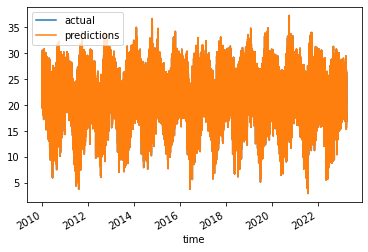

In [76]:
combined.plot()

In [77]:
reg.coef_

array([0.99999999])

In [79]:
def create_predictions(predictors, core_weather, reg):
    train = df.loc[:"1980-12-31"]
    test = df.loc["2010-01-01":]

    reg.fit(train[predictors], train["temperature_2m (°C)"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["temperature_2m (°C)"], predictions)
    
    combined = pd.concat([test["temperature_2m (°C)"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [81]:
redictors = ["temperature_2m (°C)"]

error, combined = create_predictions(predictors, df, reg)
error

4.112605763108921e-15

<AxesSubplot:xlabel='time'>

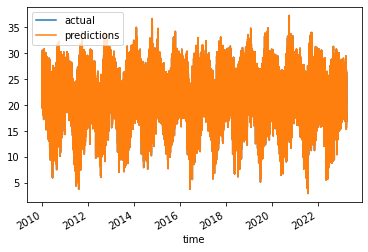

In [82]:
combined.plot()

In [85]:
df["time"] = df["temperature_2m (°C)"].groupby(df.index.month).apply(lambda x: x.expanding(1).mean())

C:\Users\vinic\AppData\Local\Temp/ipykernel_32916/1761871826.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df["time"] = df["temperature_2m (°C)"].groupby(df.index.month).apply(lambda x: x.expanding(1).mean())


ValueError: cannot reindex on an axis with duplicate labels

In [86]:
df.corr()["temperature_2m (°C)"]

temperature_2m (°C)          1.000000
relativehumidity_2m (%)     -0.606157
dewpoint_2m (°C)             0.571067
apparent_temperature (°C)    0.970362
rain (mm)                    0.110011
Name: temperature_2m (°C), dtype: float64

In [87]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [88]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
time,,,
2020-10-07 16:00:00,37.3,37.3,2.319056e-07
2020-10-07 00:00:00,37.3,37.3,2.319056e-07
2020-10-07 13:00:00,36.9,36.9,2.266603e-07
2020-10-07 15:00:00,36.9,36.9,2.266603e-07
2020-10-07 14:00:00,36.7,36.7,2.240377e-07
2014-10-18 00:00:00,36.7,36.7,2.240377e-07
2014-10-18 14:00:00,36.7,36.7,2.240377e-07
2014-10-18 15:00:00,36.4,36.4,2.201037e-07
2020-10-07 17:00:00,36.4,36.4,2.201037e-07
